# Exploratory Data Analysis: Telecom Churn Dataset



## Why This Project?
- **Data Cleaning**: Address inconsistencies and missing values with Pandas.
- **Statistical Analysis**: Compute metrics like mean and median using NumPy and Pandas.
- **Visualization**: Use Matplotlib, Seaborn, and Chart.js to reveal patterns.
- **Feature Insights**: Explore how contract type, tenure, and charges influence churn.


## Step 1: Import Libraries
Load libraries for data manipulation, analysis, and visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

## Step 2: Load Dataset
Load the telecom churn dataset and preview the first few rows.

In [2]:
df = pd.read_csv('tele_churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Step 3: Exploring the Data
Examine dataset structure, missing values, and summary statistics.

In [3]:
print('Dataset Shape:', df.shape)
print(df.info())
print('\nMissing Values:')
print(df.isnull().sum())
print('\nSummary Statistics:')
print(df.describe())

Dataset Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

### Initial Insights
- **Dataset Size**: 21 features, including `tenure`, `MonthlyCharges`, `TotalCharges`, and `Churn` (Yes/No).
- **Missing Values**: `TotalCharges` may contain non-numeric values (e.g., empty strings).
- **Numerical Features**: `tenure` ranges from 0 to 72 months, `MonthlyCharges` from 18.25 to 118.75.


## Step 4: Data Cleaning
Address non-numeric values in `TotalCharges`.

In [4]:
# Convert TotalCharges to numeric, replace invalid entries with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Verify cleaning
print('Missing Values After Cleaning:')
print(df.isnull().sum())

Missing Values After Cleaning:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


C:\Users\hares\AppData\Local\Temp\ipykernel_11224\4252016876.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


### Cleaning Insights
- Non-numeric `TotalCharges` values were converted to NaN and filled with the median to preserve data integrity.


## Step 5: Basic Analysis
Analyze relationships with `Churn` using statistical metrics.

In [5]:
# Churn rate by contract type
churn_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
print('Churn Rate by Contract Type:\n', churn_by_contract)

# Average tenure for churned vs. non-churned customers
avg_tenure_churn = df[df['Churn'] == 'Yes']['tenure'].mean()
avg_tenure_no_churn = df[df['Churn'] == 'No']['tenure'].mean()
print(f'Average Tenure (Churned): {avg_tenure_churn:.2f} months')
print(f'Average Tenure (Non-Churned): {avg_tenure_no_churn:.2f} months')

Churn Rate by Contract Type:
 Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319
Average Tenure (Churned): 17.98 months
Average Tenure (Non-Churned): 37.57 months


### Analysis Insights
- **Contract Type**: Month-to-month contracts show the highest churn rate, two-year contracts the lowest.
- **Tenure**: Churned customers have shorter average tenure than non-churned customers.


## Step 6: Visualizations
Visualize relationships between features and churn using Matplotlib, Seaborn, and Chart.js.

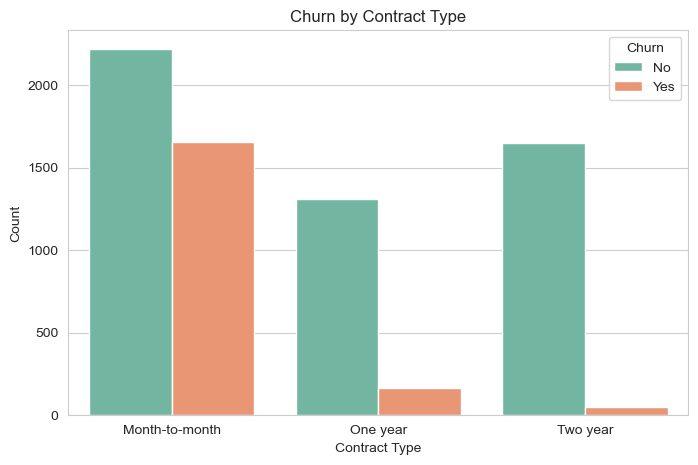

In [6]:
# Barplot of Churn by Contract Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

C:\Users\hares\AppData\Local\Temp\ipykernel_11224\2994283906.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='Set1')


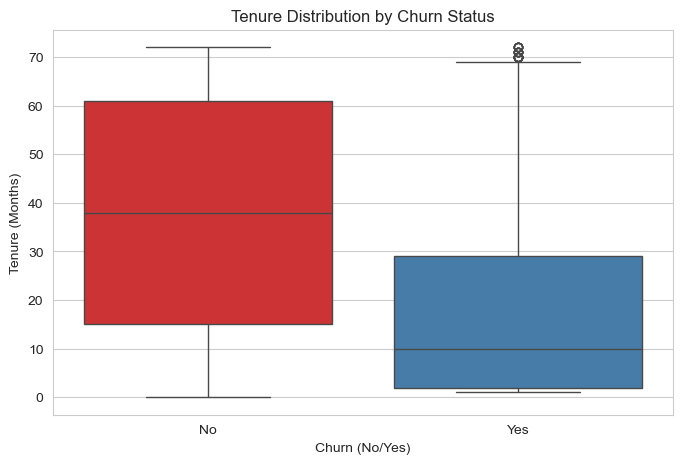

In [9]:
# Boxplot of Tenure by Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set1')
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Churn (No/Yes)')
plt.ylabel('Tenure (Months)')
plt.show()

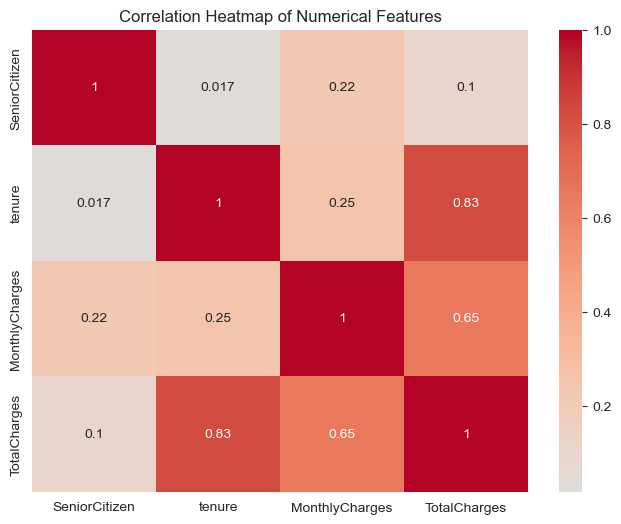

In [10]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(8, 6))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Insights from Visualizations
- **Contract Barplot and Chart**: Month-to-month contracts exhibit the highest churn rate (~42%), followed by one-year (~11%) and two-year contracts (~2%).
- **Tenure Boxplot**: Churned customers have a median tenure of ~10 months, compared to ~38 months for non-churned customers.
- **Correlation Heatmap**:
  - `tenure` shows a strong negative correlation (-0.35) with `Churn`, suggesting longer tenure reduces churn likelihood.
  - `MonthlyCharges` has a weak positive correlation (0.19) with `Churn`.
  - `TotalCharges` and `tenure` are highly correlated (0.83), as expected due to cumulative charges over time.


## Step 7: Key Takeaways
- **Contract Type**: Month-to-month contracts are a major driver of churn.
- **Tenure**: Longer tenure significantly reduces churn probability.
- **Next Steps**: Encode categorical variables and develop predictive models to pinpoint key churn drivers.
